# Machine Learning - Practical Application. PCOS Analysis
---

<img src="https://www.deepaganesh.com/wp-content/uploads/2020/07/xpolycystic-ovary-syndrome-pcos-treatment-doctor-chennai.jpg.pagespeed.ic.43BAal5EiG.webp" width="400" align="left">


# Table of contents

1. [Dataset description](#dataset_description)
2. [Preprocessing](#preprocessing)
3. [Exploratory Data Analysis](#eda)
4. [Clustering](#clustering)
5. [Feature selection](#fs)
6. [Non probabilistic supervised classification](#npsc)
7. [Probabilistic supervised classification](#psc)
8. [Metaclassifiers](#meta)
9. [References](#references)


## 1. Dataset description <a name="dataset_description"></a>

The dataset was retrieved from Kaggle [1](#kaggle). It was uploaded by Prasoon Kottarathil. Data was collected from 10 different hospitals across Kerala, India. The dataset contains 1 class variable, 41 predictor variables and 541 observations. There are numerical and categorical variables. Some specifications included in his post are needed to understand the data:

* For every Yes/No question, 1 = Yes and 0 = No
* Blood Group indications:
    * 11 = A+
    * 12 = A-
    * 13 = B+
    * 14 = B-
    * 15 = 0+
    * 16 = 0-
    * 17 = AB+
    * 18 = AB-
* Blood pressure entered as systolic and diastolic separately
* RBS means Random glucose test
* Beta-HCG cases are mentioned as Case I and II.
* 2 = Regular cycle, 4 = Irregular cycle
* There are 2 data files which need to be joined and filtered

## 2. Preprocessing <a name="preprocessing"></a>

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data
file_1 = pd.read_csv('./data/PCOS_infertility.csv')
file_2 = pd.read_excel('./data/PCOS_data_without_infertility.xlsx', sheet_name = 'Full_new')

In [3]:
file_1.shape

(541, 6)

In [4]:
file_1.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'],
      dtype='object')

In [5]:
file_1.head(5)

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [6]:
file_2.shape

(541, 45)

In [7]:
file_2.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [8]:
file_2.head(5)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [9]:
# Merging data based on Patient File No.
data = pd.merge(file_2,file_1, on = 'Patient File No.', suffixes = ('','_y'), how='left')

In [10]:
data.shape

(541, 50)

In [11]:
# Drop repetitive values
data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y', 'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1, inplace= True)

In [12]:
data.head(5)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [14]:
# Dealing with object type value
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

In [15]:
data.isnull().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    1
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                1
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [16]:
# Dealing with missing values, filling with median value for that feature
data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)
data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(),inplace=True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)

In [17]:
data.isnull().sum().sum()

0

In [18]:
# Clear extra spaces in feature names
data.columns = [col.strip() for col in data.columns]

In [19]:
# Drop irrelevant columns
data = data.drop(['Sl. No', 'Patient File No.'], axis = 1)

## 3. Exploratory Data Analysis <a name="eda"></a>

In [20]:
data.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,2.560074,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,0.901950,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


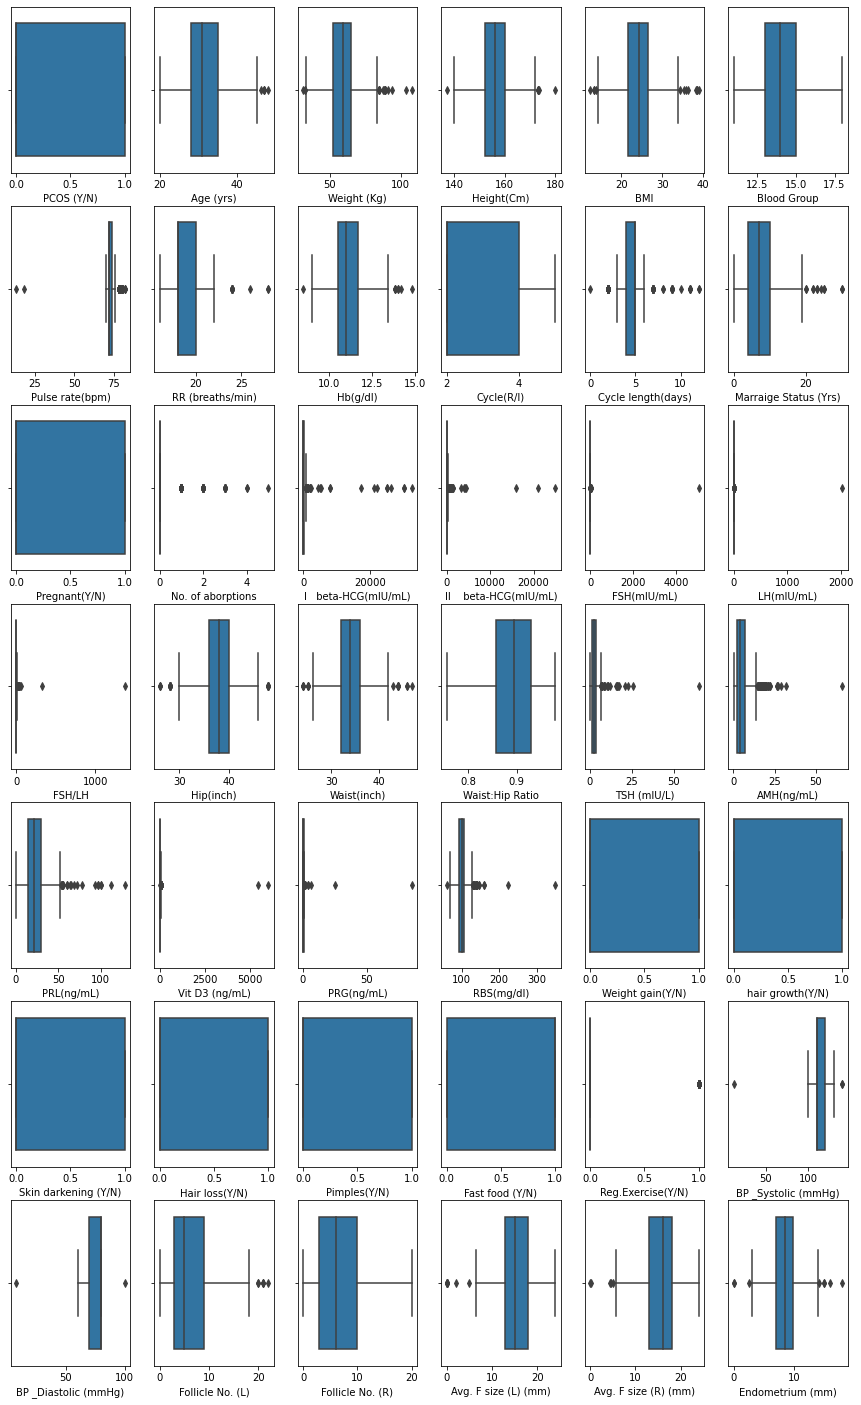

In [21]:
# Outliers detection
features = data.columns
fig, axes = plt.subplots(7,6, figsize = (15, 25))
f = -1 # Initialize features index at -1
for i in range (0,7):
    for j in range (0,6): 
        f +=1
        sns.boxplot(ax = axes[i,j], x = features[f],data=data); # Iterate over the axes of the plot and the features list

In [22]:
data = data[(data["Pulse rate(bpm)"]>30)]
data = data[(data["FSH(mIU/mL)"]<2000)]
data = data[(data["LH(mIU/mL)"]<1000)]
data = data[(data["FSH/LH"]<1000)]
data = data[(data['TSH (mIU/L)']<50)]
data = data[(data["AMH(ng/mL)"]<40)]
data = data[(data["Vit D3 (ng/mL)"]<2500)]
data = data[(data["PRG(ng/mL)"]<20)]
data = data[(data["RBS(mg/dl)"]<200)]
data = data[(data["BP _Systolic (mmHg)"]>50)]
data = data[(data["BP _Diastolic (mmHg)"]>50)]
data = data[(data["Avg. F size (L) (mm)"]>1)]
data = data[(data["Avg. F size (R) (mm)"]>1)]
data = data[(data["Endometrium (mm)"]>1)]

In [23]:
data.shape

(516, 42)

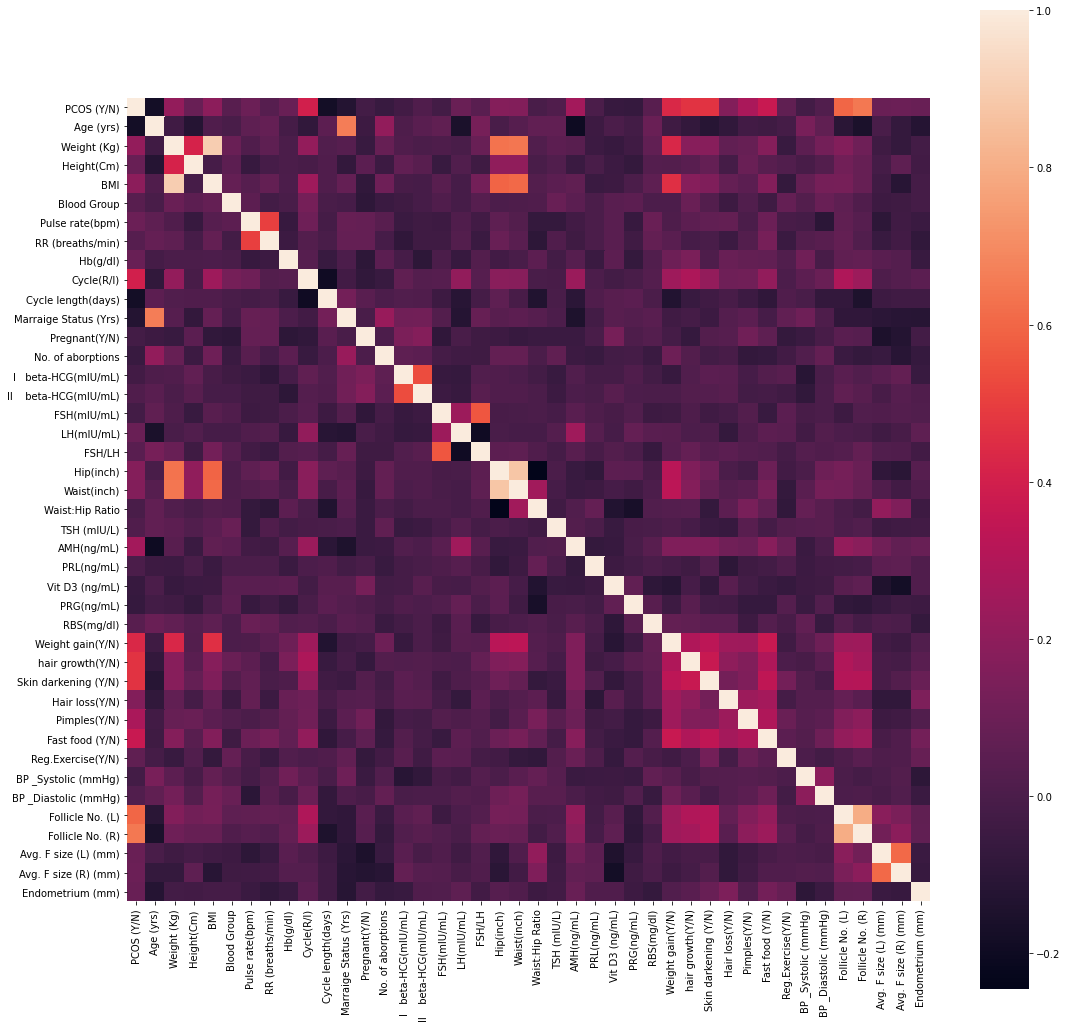

In [24]:
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat, square=True);

In [25]:
corrmat["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.645289
Follicle No. (L)          0.599863
Skin darkening (Y/N)      0.466422
hair growth(Y/N)          0.465543
Weight gain(Y/N)          0.431819
Cycle(R/I)                0.399884
Fast food (Y/N)           0.372352
Pimples(Y/N)              0.278577
AMH(ng/mL)                0.258375
Weight (Kg)               0.215702
BMI                       0.193991
Hip(inch)                 0.170560
Hair loss(Y/N)            0.166352
Waist(inch)               0.163891
Pulse rate(bpm)           0.100057
Avg. F size (R) (mm)      0.099372
Avg. F size (L) (mm)      0.094141
LH(mIU/mL)                0.090622
Hb(g/dl)                  0.088765
Height(Cm)                0.086788
Endometrium (mm)          0.086273
Reg.Exercise(Y/N)         0.062739
FSH/LH                    0.044325
Blood Group               0.041517
RBS(mg/dl)                0.037141
RR (breaths/min)          0.034674
BP _Diastolic (mmHg)      0.017812
TSH (mIU/L)         

In [26]:
# Splitting between class and predictor variables
X=data.drop(["PCOS (Y/N)"],axis = 1)
y=data["PCOS (Y/N)"]

In [27]:
# standarize data
from sklearn import preprocessing

X = preprocessing.MinMaxScaler().fit_transform(X)

In [28]:
X

array([[0.28571429, 0.17662338, 0.34883721, ..., 0.72727273, 0.69230769,
        0.38709677],
       [0.57142857, 0.44155844, 0.56976744, ..., 0.59090909, 0.48717949,
        0.07741935],
       [0.46428571, 0.49090909, 0.65116279, ..., 0.72727273, 0.79487179,
        0.48387097],
       ...,
       [0.57142857, 0.2987013 , 0.34883721, ..., 0.72727273, 0.23076923,
        0.30967742],
       [0.25      , 0.24675325, 0.30232558, ..., 0.72727273, 0.58974359,
        0.58064516],
       [0.10714286, 0.66233766, 0.65116279, ..., 0.77272727, 0.69230769,
        0.28387097]])

In [29]:
y

0      0
1      0
2      1
3      0
4      0
      ..
536    0
537    0
538    0
539    0
540    1
Name: PCOS (Y/N), Length: 516, dtype: int64

## 4. Clustering <a name="clustering"></a>

### 4.1. Aglomerative hierarchical clustering

#### 4.1.1. Single linkage

In [30]:
from sklearn.cluster import AgglomerativeClustering

sl_cluster = AgglomerativeClustering(n_clusters = None, distance_threshold = 0, linkage = 'single')
sl_cluster = sl_cluster.fit(X)

In [31]:
sl_cluster.n_clusters_

516

In [32]:
distances = sl_cluster.distances_
print(distances.min())
print(distances.max())

0.4869957591279643
2.113000749506058


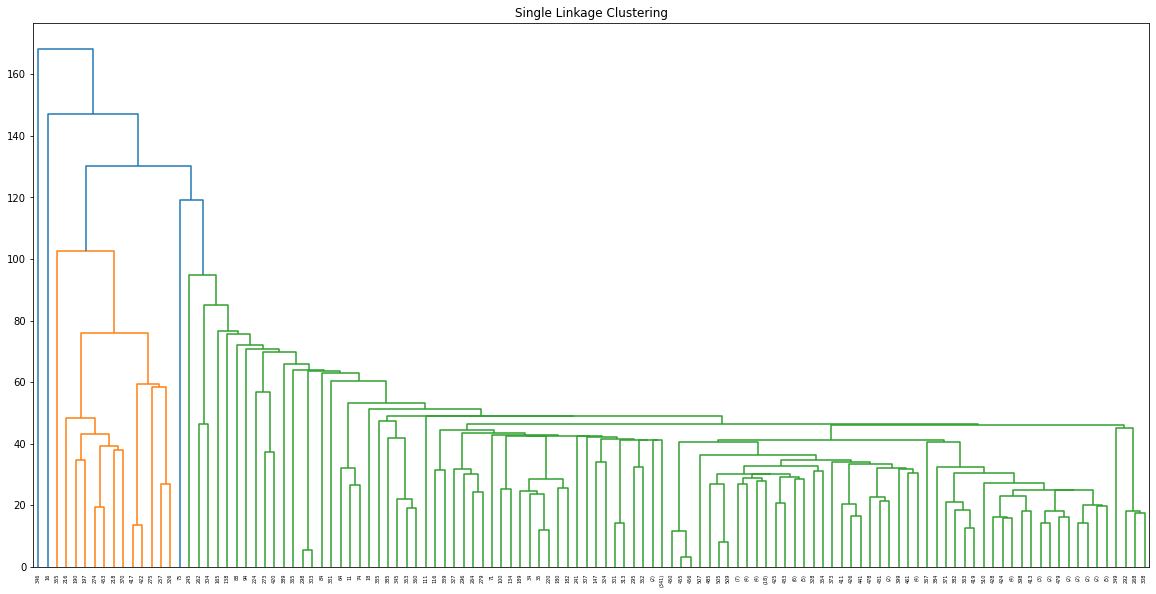

In [33]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

linkage_matrix = hierarchy.linkage(sl_cluster.children_, 'single')
plt.figure(figsize=(20,10))
plt.title('Single Linkage Clustering')
dn = hierarchy.dendrogram(linkage_matrix, truncate_mode='level')

#### 4.1.2. Complete linkage

In [34]:
cl_cluster = AgglomerativeClustering(n_clusters = None, distance_threshold = 0, linkage = 'complete')
cl_cluster = cl_cluster.fit(X)

In [35]:
cl_cluster.n_clusters_

516

In [36]:
distances = cl_cluster.distances_
print(distances.min())
print(distances.max())

0.4869957591279643
3.6499553893058403


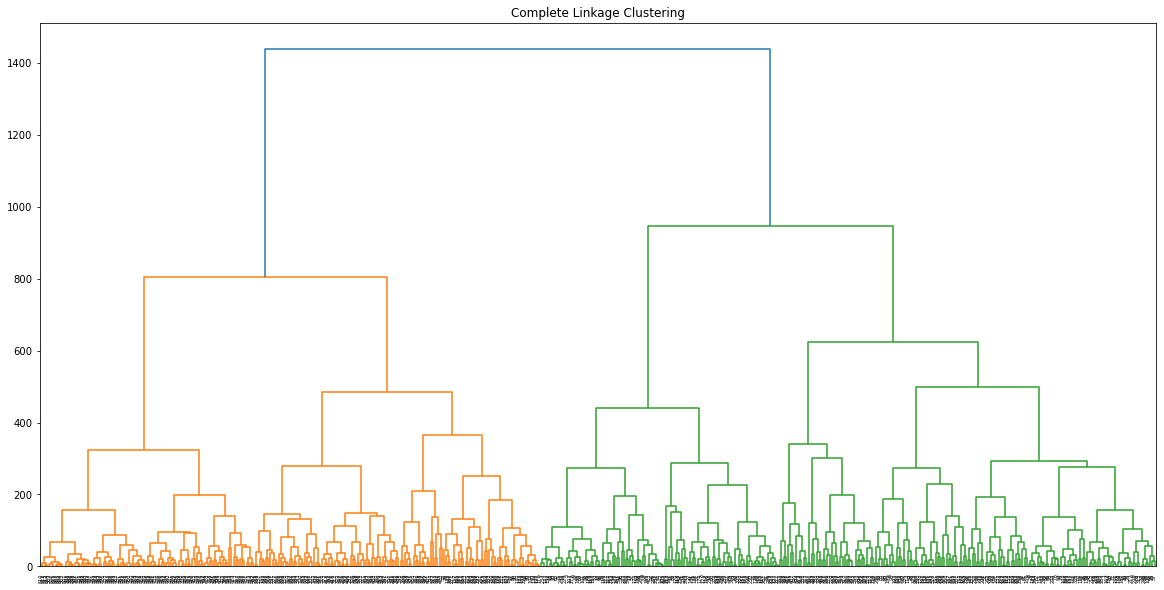

In [37]:
linkage_matrix = hierarchy.linkage(cl_cluster.children_, 'complete')
plt.figure(figsize=(20,10))
plt.title('Complete Linkage Clustering')
dn = hierarchy.dendrogram(linkage_matrix, truncate_mode='level')

#### 4.1.3. Average linkage

In [38]:
al_cluster = AgglomerativeClustering(n_clusters = None, distance_threshold = 0, linkage = 'average')
al_cluster = al_cluster.fit(X)

In [39]:
al_cluster.n_clusters_

516

In [40]:
distances = al_cluster.distances_
print(distances.min())
print(distances.max())

0.4869957591279643
2.7825073840898327


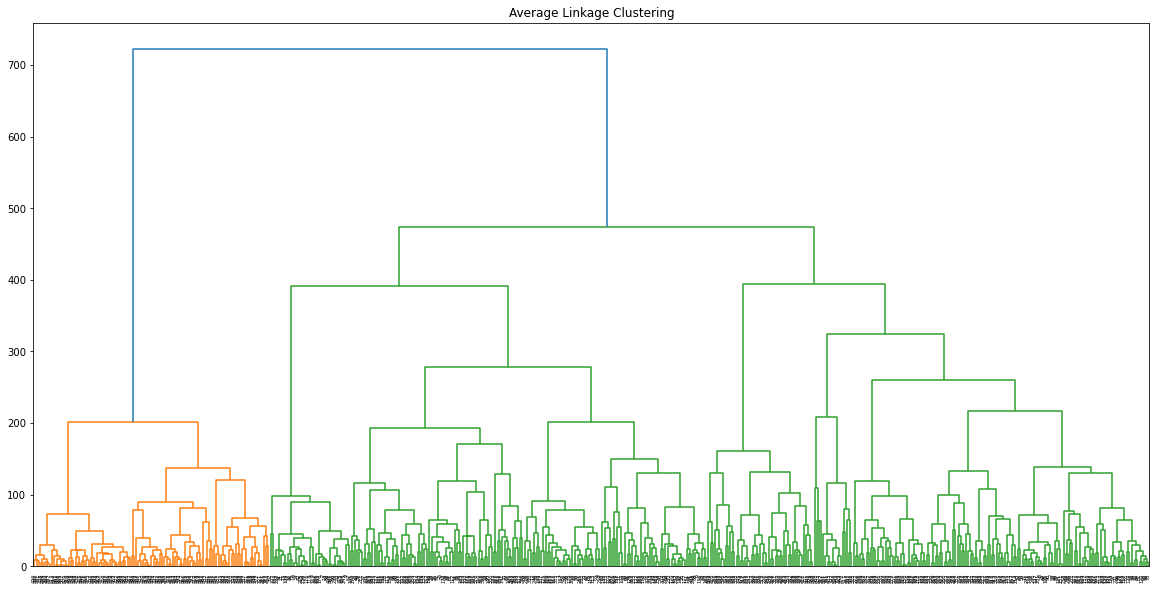

In [41]:
linkage_matrix = hierarchy.linkage(al_cluster.children_, 'average')
plt.figure(figsize=(20,10))
plt.title('Average Linkage Clustering')
dn = hierarchy.dendrogram(linkage_matrix, truncate_mode='level')

#### 4.1.4. Ward

In [42]:
wl_cluster = AgglomerativeClustering(n_clusters = None, distance_threshold = 0, linkage = 'ward')
wl_cluster = wl_cluster.fit(X)

In [43]:
wl_cluster.n_clusters_

516

In [44]:
distances = wl_cluster.distances_
print(distances.min())
print(distances.max())

0.4869957591279643
19.23157129809037


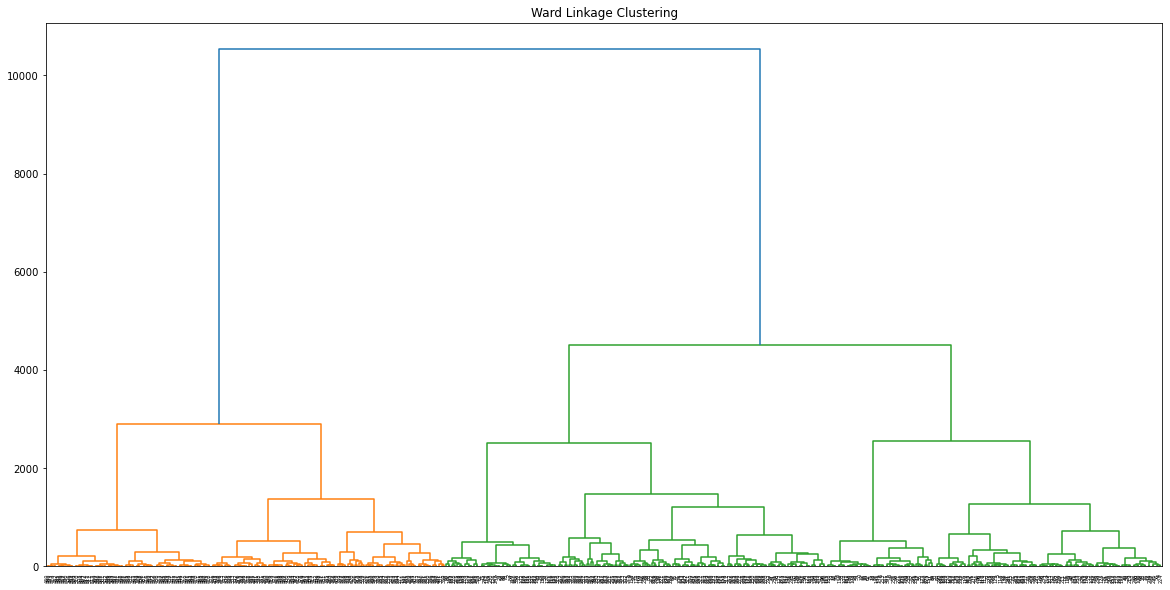

In [45]:
linkage_matrix = hierarchy.linkage(wl_cluster.children_, 'ward')
plt.figure(figsize=(20,10))
plt.title('Ward Linkage Clustering')
dn = hierarchy.dendrogram(linkage_matrix, truncate_mode='level')

### 4.2. Partitional. K-Means

In [46]:
from sklearn.cluster import KMeans

In [47]:
k_2 = KMeans(n_clusters=2)
k_2.fit(X)
clusters_2 = k_2.labels_
clusters_2

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [48]:
from sklearn.decomposition import PCA

Text(0.5, 1.0, 'Color = ytrue')

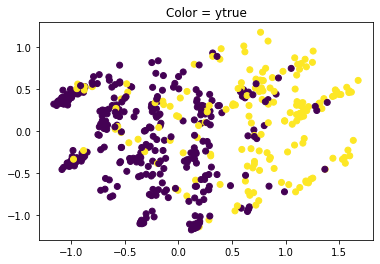

In [49]:
miPCA = PCA(n_components=2)
Xtr = miPCA.fit_transform(X)
Xtr
plt.scatter(Xtr[:,0],Xtr[:,1],c=y)
plt.title('Color = ytrue')

Text(0.5, 1.0, 'Color = clusters')

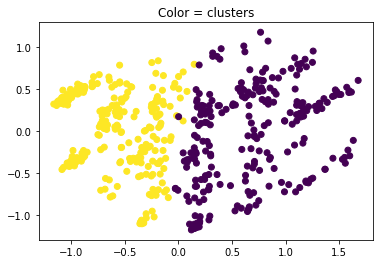

In [50]:
plt.scatter(Xtr[:,0],Xtr[:,1],c=clusters_2)
plt.title('Color = clusters')

In [51]:
k_3 = KMeans(n_clusters=3)
k_3.fit(X)
clusters_3 = k_3.labels_
clusters_3

array([1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 0, 2, 1, 1, 2,
       2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 2, 2,
       0, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 2, 1,
       2, 0, 2, 1, 2, 0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 2, 2, 2, 2,

Text(0.5, 1.0, 'Color = clusters')

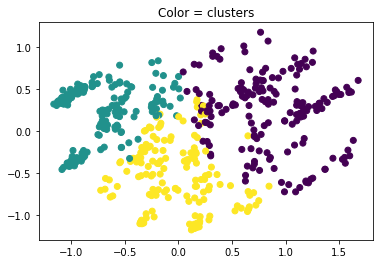

In [52]:
plt.scatter(Xtr[:,0],Xtr[:,1],c=clusters_3)
plt.title('Color = clusters')

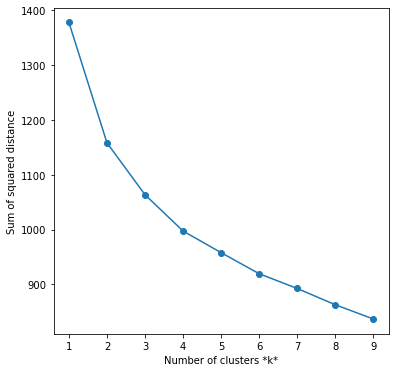

In [53]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [54]:
from kneed import KneeLocator
kl = KneeLocator(range(2, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

In [57]:
from sklearn.metrics import silhouette_score

In [58]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

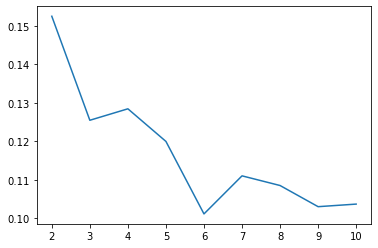

In [59]:
plt.plot(range(2, 11), silhouette_coefficients)

### 4.3. Probabilistic. Gaussian Mixture Model

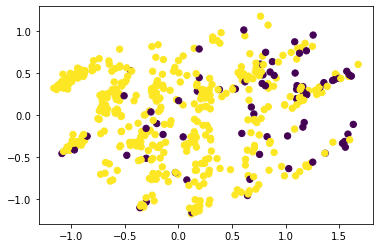

In [60]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2).fit(X)
labels = gmm.predict(X)
plt.scatter(Xtr[:, 0], Xtr[:, 1], c=labels, s=40, cmap='viridis');

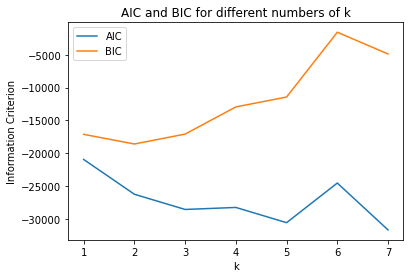

In [162]:
Sum_bic = []
Sum_aic = []

K = range(1,8)
for k in K:
    gmm = GaussianMixture(n_components=k)
    gmm = gmm.fit(X)
    Sum_bic.append(gmm.bic(X))
    Sum_aic.append(gmm.aic(X))
x1 = K
y1 = Sum_aic
plt.plot(x1, y1, label = "AIC")
x2 = K
y2 = Sum_bic
plt.plot(x2, y2, label = "BIC")

plt.title("AIC and BIC for different numbers of k")
plt.xlabel("k")
plt.ylabel("Information Criterion")
plt.legend(loc='upper left')
plt.show()

## 5. Feature Selection <a name="fs"></a>

### 5.1. Univariate filter

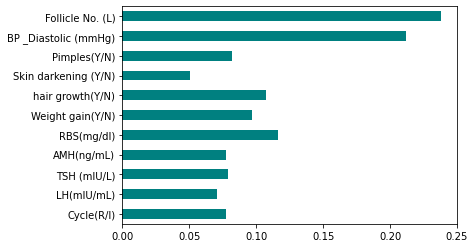

In [79]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X,y)
feature_imp = pd.Series(importances, data.columns[0:len(data.columns)-1])
feature_imp = feature_imp[(feature_imp>0.05)]
feature_imp.plot(kind = 'barh', color= 'teal')
plt.show()

In [87]:
feature_imp.sort_values(ascending=False)

Follicle No. (L)        0.238160
BP _Diastolic (mmHg)    0.212038
RBS(mg/dl)              0.116384
hair growth(Y/N)        0.107663
Weight gain(Y/N)        0.096978
Pimples(Y/N)            0.082016
TSH (mIU/L)             0.079034
AMH(ng/mL)              0.077704
Cycle(R/I)              0.077081
LH(mIU/mL)              0.070599
Skin darkening (Y/N)    0.050810
dtype: float64

In [100]:
Xunivariate = data[feature_imp.index]

In [101]:
Xunivariate = preprocessing.MinMaxScaler().fit_transform(Xunivariate)

array([[0.        , 0.24948875, 0.02473908, ..., 0.        , 0.5       ,
        0.13636364],
       [0.        , 0.07293797, 0.12060302, ..., 0.        , 0.25      ,
        0.13636364],
       [0.        , 0.05862304, 0.09663703, ..., 1.        , 0.5       ,
        0.59090909],
       ...,
       [0.        , 0.18813906, 0.10939312, ..., 0.        , 0.5       ,
        0.04545455],
       [0.66666667, 0.29379686, 0.09509084, ..., 1.        , 0.25      ,
        0.31818182],
       [0.66666667, 0.29175187, 0.0626208 , ..., 1.        , 0.25      ,
        0.40909091]])

### 5.2. Multivariate filter

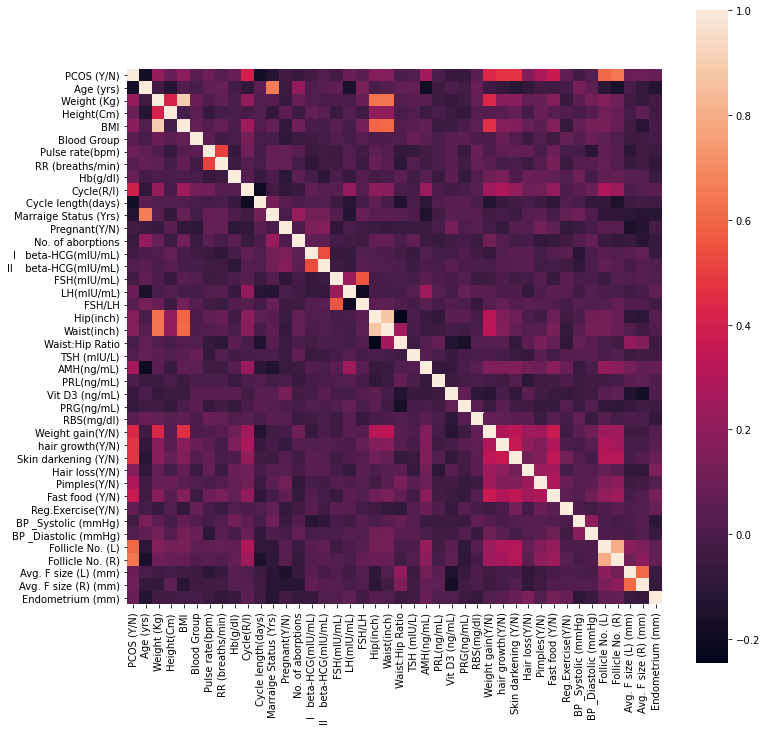

In [102]:
corrmat = data.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, square=True);

In [118]:
corr_target = abs(corrmat["PCOS (Y/N)"])
relevant_features = corr_target[corr_target>0.20]
relevant_features.sort_values(ascending= False)

PCOS (Y/N)              1.000000
Follicle No. (R)        0.645289
Follicle No. (L)        0.599863
Skin darkening (Y/N)    0.466422
hair growth(Y/N)        0.465543
Weight gain(Y/N)        0.431819
Cycle(R/I)              0.399884
Fast food (Y/N)         0.372352
Pimples(Y/N)            0.278577
AMH(ng/mL)              0.258375
Weight (Kg)             0.215702
Name: PCOS (Y/N), dtype: float64

In [121]:
Xmultivariate = data[relevant_features.index]
Xmultivariate = preprocessing.MinMaxScaler().fit_transform(Xmultivariate)
Xmultivariate

array([[0.        , 0.17662338, 0.        , ..., 1.        , 0.13636364,
        0.15      ],
       [0.        , 0.44155844, 0.        , ..., 0.        , 0.13636364,
        0.25      ],
       [1.        , 0.49090909, 0.        , ..., 1.        , 0.59090909,
        0.75      ],
       ...,
       [0.        , 0.2987013 , 0.        , ..., 0.        , 0.04545455,
        0.        ],
       [0.        , 0.24675325, 0.66666667, ..., 0.        , 0.31818182,
        0.3       ],
       [1.        , 0.66233766, 0.66666667, ..., 1.        , 0.40909091,
        0.5       ]])

## 6. Non probabilistic supervised classification <a name="npsc"></a>

### 6.1. KNN

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [187]:
X_train,X_test, y_train, y_test = train_test_split(Xmultivariate,y, test_size=0.3) 

In [192]:
params = {'n_neighbors':[3,5,7],'weights':['uniform','distance'],'p':[1,2,3]}

miModelo = KNeighborsClassifier()
gs = GridSearchCV(estimator=miModelo,param_grid=params,scoring='accuracy',cv=5,verbose=2)

In [193]:
gs.fit(X_train,y_train)
resultsCV = gs.cv_results_

clfBest = gs.best_estimator_
clfBest.fit(X_train,y_train)

y_pred = clfBest.predict(X_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] .............. n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] .............. n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] .............. n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] .............. n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] .............. n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV] ............. n_neighbors=3, p=1, weights=distance, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............. n_neighbors=5, p=2, weights=uniform, total=   0.0s
[CV] n_neighbors=5, p=2, weights=distance ............................
[CV] ............. n_neighbors=5, p=2, weights=distance, total=   0.0s
[CV] n_neighbors=5, p=2, weights=distance ............................
[CV] ............. n_neighbors=5, p=2, weights=distance, total=   0.0s
[CV] n_neighbors=5, p=2, weights=distance ............................
[CV] ............. n_neighbors=5, p=2, weights=distance, total=   0.0s
[CV] n_neighbors=5, p=2, weights=distance ............................
[CV] ............. n_neighbors=5, p=2, weights=distance, total=   0.0s
[CV] n_neighbors=5, p=2, weights=distance ............................
[CV] ............. n_neighbors=5, p=2, weights=distance, total=   0.0s
[CV] n_neighbors=5, p=3, weights=uniform .............................
[CV] .............. n_neighbors=5, p=3, weights=uniform, total=   0.0s
[CV] n_neighbors=5, p=3, weights=uniform .............................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.3s finished


1.0


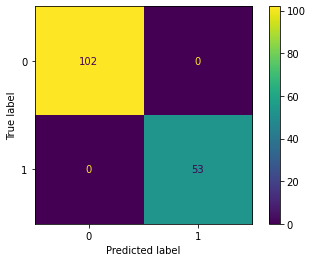

In [194]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clfBest,X_test,y_test)

In [195]:
from sklearn.metrics import classification_report
classi_report = classification_report(y_test, y_pred)
print(classi_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00        53

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



In [196]:
gs.best_estimator_

KNeighborsClassifier(p=1, weights='distance')

### 6.2. Artificial neural networks

In [197]:
from sklearn.neural_network import MLPClassifier

In [210]:
X_train,X_test, y_train, y_test = train_test_split(Xmultivariate,y, test_size=0.3) 

In [211]:
params = {'hidden_layer_sizes':[(20),(20,20),(50,50),(100,100,100)],
          'activation':['identity', 'tanh', 'relu'],'alpha':[0.001,0.01]}

miModelo = MLPClassifier()
gs = GridSearchCV(estimator=miModelo,param_grid=params,scoring='accuracy',cv=5)

In [212]:
gs.fit(X_train,y_train)
resultsCV = gs.cv_results_

clfBest = gs.best_estimator_
clfBest.fit(X_train,y_train)

y_pred = clfBest.predict(X_test)

C:\Users\manub\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\manub\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\manub\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\manub\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\manub\anaconda3\lib\site-packages\sklearn\neural_network\_multi

1.0


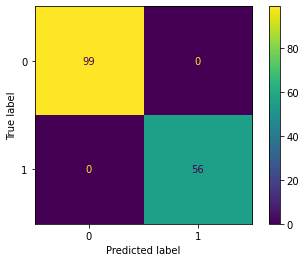

In [213]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clfBest,X_test,y_test)

In [214]:
from sklearn.metrics import classification_report
classi_report = classification_report(y_test, y_pred)
print(classi_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        56

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



In [204]:
gs.best_estimator_

MLPClassifier(activation='identity', alpha=0.001, hidden_layer_sizes=20)

### 6.3. SVM

In [215]:
from sklearn.svm import SVC

In [228]:
X_train,X_test, y_train, y_test = train_test_split(Xmultivariate,y, test_size=0.3) 

In [229]:
params = {'C':[0.1,1,10,100,1000],
          'kernel':['rbf','poly','sigmoid'],
          'degree':[2,3,4],
          'gamma':['scale', 'auto', 0.1],
          'coef0':[0.0]}

miModelo = SVC()
gs = GridSearchCV(estimator=miModelo,param_grid=params,scoring='accuracy',cv=5)

In [230]:
gs.fit(X_train,y_train)
resultsCV = gs.cv_results_

clfBest = gs.best_estimator_
clfBest.fit(X_train,y_train)

y_pred = clfBest.predict(X_test)

1.0


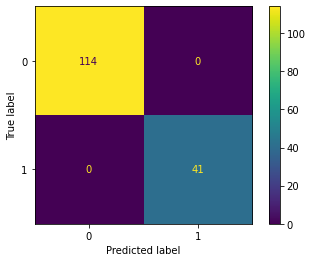

In [231]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clfBest,X_test,y_test)

In [232]:
from sklearn.metrics import classification_report
classi_report = classification_report(y_test, y_pred)
print(classi_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00        41

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



In [227]:
gs.best_estimator_

SVC(C=0.1, degree=2, gamma='auto', kernel='poly')

### 6.4. Classification tree 

In [233]:
from sklearn.tree import DecisionTreeClassifier

In [245]:
X_train,X_test, y_train, y_test = train_test_split(Xmultivariate,y, test_size=0.3) 

In [246]:
params = {'criterion':["gini", "entropy"],
          'max_depth':[3],
          'min_samples_split':[2,4,8,16]}

miModelo = DecisionTreeClassifier()
gs = GridSearchCV(estimator=miModelo,param_grid=params,scoring='accuracy',cv=5)

In [247]:
gs.fit(X_train,y_train)
resultsCV = gs.cv_results_

clfBest = gs.best_estimator_
clfBest.fit(X_train,y_train)

y_pred = clfBest.predict(X_test)

1.0


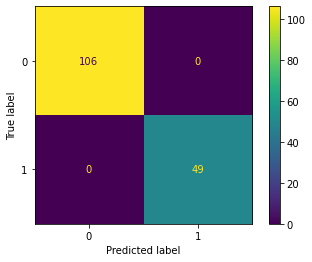

In [248]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clfBest,X_test,y_test)

In [249]:
from sklearn.metrics import classification_report
classi_report = classification_report(y_test, y_pred)
print(classi_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00        49

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



In [239]:
gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=16)

## 7. Probabilistic supervised classification <a name="psc"></a>

### 7.1. Logistic regression

In [250]:
from sklearn.linear_model import LogisticRegression

In [263]:
X_train,X_test, y_train, y_test = train_test_split(Xmultivariate,y, test_size=0.3) 

In [264]:
params = {'penalty':['l1', 'l2', 'elasticnet', 'none']}
miModelo = LogisticRegression()
gs = GridSearchCV(estimator=miModelo,param_grid=params,scoring='accuracy',cv=5)

In [265]:
gs.fit(X_train,y_train)
resultsCV = gs.cv_results_

clfBest = gs.best_estimator_
clfBest.fit(X_train,y_train)

y_pred = clfBest.predict(X_test)

C:\Users\manub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\manub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\manub\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\manub\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\manub\anaconda3\lib\site-packages\sklearn\model_selection\_v

1.0


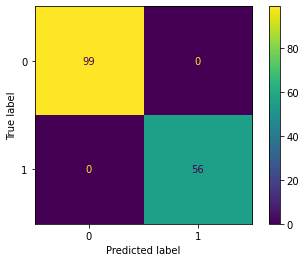

In [266]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clfBest,X_test,y_test)

In [267]:
from sklearn.metrics import classification_report
classi_report = classification_report(y_test, y_pred)
print(classi_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        56

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



In [257]:
gs.best_estimator_

LogisticRegression()

### 7.2. Discriminant analysis

In [268]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [286]:
X_train,X_test, y_train, y_test = train_test_split(Xmultivariate,y, test_size=0.3) 

In [287]:
params = {'solver':['lvd', 'lsqr', 'eigen']}
miModelo = LinearDiscriminantAnalysis()
gs = GridSearchCV(estimator=miModelo,param_grid=params,scoring='accuracy',cv=5)

In [288]:
gs.fit(X_train,y_train)
resultsCV = gs.cv_results_

clfBest = gs.best_estimator_
clfBest.fit(X_train,y_train)

y_pred = clfBest.predict(X_test)

C:\Users\manub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\manub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\manub\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 470, in fit
    raise ValueError("unknown solver {} (valid solvers are 'svd', "
ValueError: unknown solver lvd (valid solvers are 'svd', 'lsqr', and 'eigen').

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\manub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File

0.9161290322580645


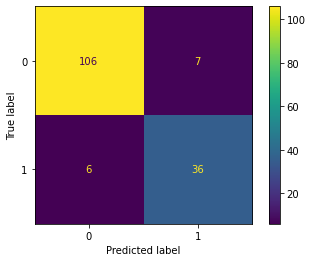

In [289]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clfBest,X_test,y_test)

In [290]:
from sklearn.metrics import classification_report
classi_report = classification_report(y_test, y_pred)
print(classi_report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       113
           1       0.84      0.86      0.85        42

    accuracy                           0.92       155
   macro avg       0.89      0.90      0.89       155
weighted avg       0.92      0.92      0.92       155



In [285]:
gs.best_estimator_

LinearDiscriminantAnalysis(solver='lsqr')

## 8. Metaclassifiers <a name="meta"></a>

### 8.1. AdaBoost

In [309]:
from sklearn.ensemble import AdaBoostClassifier

In [327]:
X_train,X_test, y_train, y_test = train_test_split(Xmultivariate,y, test_size=0.3) 

In [328]:

params = {'n_estimators':[1000],
          'learning_rate':[1,0.9,0.8]}

miModelo = AdaBoostClassifier()
gs = GridSearchCV(estimator=miModelo,param_grid=params,scoring='accuracy',cv=5)

In [329]:
gs.fit(X_train,y_train)
resultsCV = gs.cv_results_

clfBest = gs.best_estimator_
clfBest.fit(X_train,y_train)

y_pred = clfBest.predict(X_test)

1.0


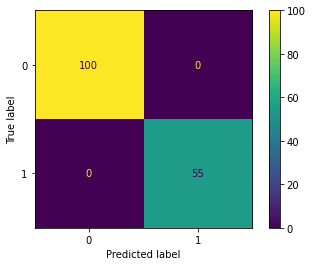

In [330]:
print(accuracy_score(y_test,y_pred))
plot_confusion_matrix(clfBest,X_test,y_test)

In [331]:
classi_report = classification_report(y_test, y_pred)
print(classi_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        55

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



In [321]:
gs.best_estimator_

AdaBoostClassifier(learning_rate=0.9, n_estimators=1000)

### 8.2. Random Forest

In [332]:
from sklearn.ensemble import RandomForestClassifier

In [345]:
X_train,X_test, y_train, y_test = train_test_split(Xmultivariate,y, test_size=0.3) 

In [346]:
params = {'n_estimators':[10,50,100,200],
          'criterion':['gini','entropy'],
          'max_depth':[3,None],
          'max_samples':[int(X_train.shape[0]*r) for r in np.linspace(0.1,1,3)]}

miModelo = RandomForestClassifier()
gs = GridSearchCV(estimator=miModelo,param_grid=params,scoring='accuracy',cv=5)

In [347]:
gs.fit(X_train,y_train)
resultsCV = gs.cv_results_

clfBest = gs.best_estimator_
clfBest.fit(X_train,y_train)

y_pred = clfBest.predict(X_test)

C:\Users\manub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\manub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\manub\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\manub\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 103, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_samples, max_samples))
ValueError: `max_samples` must be in range 1 to 288 but got value 361

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\manub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimat

C:\Users\manub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\manub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\manub\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\manub\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 103, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_samples, max_samples))
ValueError: `max_samples` must be in range 1 to 288 but got value 361

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\manub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimat

C:\Users\manub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\manub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\manub\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\manub\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 103, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_samples, max_samples))
ValueError: `max_samples` must be in range 1 to 288 but got value 361

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\manub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimat

C:\Users\manub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\manub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\manub\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\manub\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 103, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_samples, max_samples))
ValueError: `max_samples` must be in range 1 to 288 but got value 361

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\manub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimat

1.0


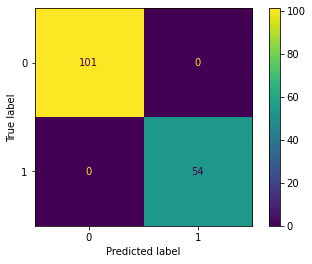

In [348]:
print(accuracy_score(y_test,y_pred))
plot_confusion_matrix(clfBest,X_test,y_test)

In [349]:
classi_report = classification_report(y_test, y_pred)
print(classi_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        54

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



In [339]:
gs.best_estimator_

RandomForestClassifier(criterion='entropy', max_samples=198, n_estimators=200)

## 9. References <a name="references"></a>

1. https://www.kaggle.com/prasoonkottarathil/polycystic-ovary-syndrome-pcos <a name="kaggle"></a>
2. https://scikit-learn.org/